In [165]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
#Guarda los polinomios
def lagrange(n,xl,yl,x):
    p = 0
    polinomio = 0 #POLINOMIO SOLUCION
    polinomios = [] #GUARDO CADA POLINOMIO
    for i in range(n): #sumas
        l = 1.0
        lagranges = 1.0
        for j in range(n): #producto
            if i != j:
                lagranges = lagranges*(symbols('x')-xl[j])  / (xl[i] - xl[j])
                l = l * (x- xl[j]) / (xl[i] - xl[j])
        polinomios.append(lagranges*yl[i])
        polinomio = polinomio +lagranges*yl[i]
        p = p+l*yl[i]
        
    return p, polinomio, polinomios
            
xl = np.array([.7,1.2,2])
yl = np.exp(xl)

n = len(xl)
estimacion,polinomio, polinomios = lagrange(n,xl,yl,1)

error = 100*(np.abs(estimacion-np.e))/np.e
print "Valor: ", np.e
print "Estimado: ",estimacion
print "ERROR % = ",error

Valor:  2.71828182846
Estimado:  2.68341221172
ERROR % =  1.28278151197


In [190]:
polinomios

[-1.54904054420806*(-2.0*x + 2.4)*(x - 2.0),
 -4.15014615342068*(x - 2.0)*(2.0*x - 1.4),
 9.23632012366331*(0.769230769230769*x - 0.538461538461538)*(x - 1.2)]

In [191]:
x0 = xl[0]
xn = xl[-1]
xs = np.linspace(x0, xn,100)

# Plot!

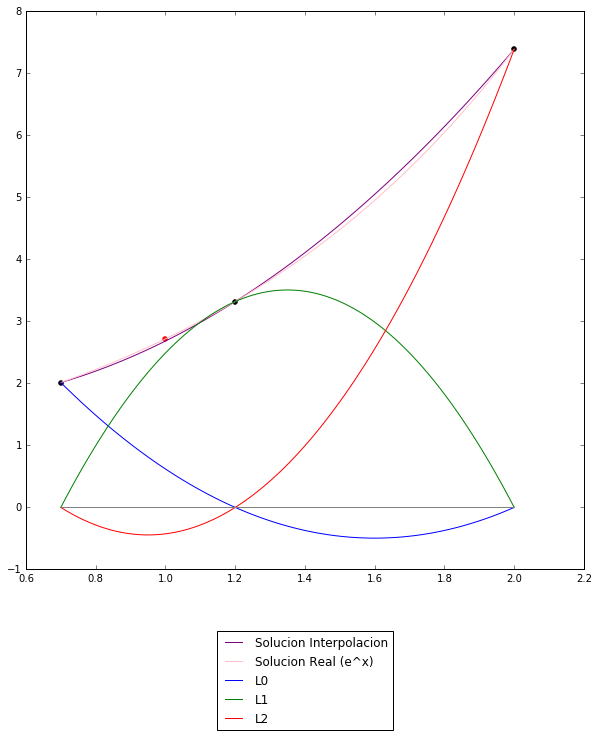

In [193]:
from sympy import *
from sympy.abc import x
#Principal polinomio
expr = polinomio
f = lambdify(x, expr)
y = f(xs)

#pol1
expr1 = polinomios[0]
f1 = lambdify(x, expr1)
y1 = f1(xs)

#pol2
expr2 = polinomios[1]
f2 = lambdify(x, expr2)
y2 = f2(xs)

#pol3
expr3 = polinomios[2]
f3 = lambdify(x, expr3)
y3 = f3(xs)

plt.figure(figsize=(10,10))
plt.plot(xs,y, color = "purple", label= "Solucion Interpolacion")
plt.plot(xs,np.exp(xs), color = "pink", label= "Solucion Real (e^x)")
plt.plot(xs,y1, color = "b", label= "L0")
plt.plot(xs,y2, color = "g", label= "L1")
plt.plot(xs,y3, color = "r", label= "L2")
plt.scatter(xl,np.exp(xl), color = "black")
plt.scatter(1,np.exp(1), color = "red")
plt.plot(xs,np.zeros(len(xs)),color="gray")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))